<a href="https://colab.research.google.com/github/Watts-Lab/deliberation-video-pipeline/blob/main/updated_vizzes_with_whisper%2C_whisperx_stable_ts%2C_deepgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import gc
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import librosa
import numpy as np

In [2]:
def getStart(filepath):
    probe = ! ffprobe $filepath
    line = [line  for line in probe if "start: " in line][0]
    pattern = r"start:\s(\d+\.\d+)"
    match = re.search(pattern, line)
    if match:
        start = float(match.group(1))
    else:
        console.log("No start time listed, using 0.0")
        start = 0.0
    return start

In [3]:
def make_df(lst, files, start_time):
  num = 0
  for file in files:
    # Read the file into a DataFrame
    df = pd.read_csv(file)  # or use pd.read_excel, pd.read_json, etc., depending on your file type
    df['speaker'] = num
    num += 1
    if 'deepgram' in file or 'whisper-' in file: # do not include whisperx
      df['start'] = df['start'] + start_time
      df['end'] = df['end'] + start_time
    lst.append(df)
  return lst

# WhisperX

# stable-ts

# Whisper

# Deepgram

## Words

In [ ]:
files = sorted(glob.glob("*deepgram-word*"))  # Pattern adjusted to match files containing "deepgram-seg"
files

['1674660535410-2428b340-9dc1-40e7-831c-0703795b3307-cam-audio-1674660538423.wav.transcript.json-deepgram-words.csv',
 '1674660535410-a7b0bec8-a1fd-4f9a-a922-e20bd56a539b-cam-audio-1674660537992.wav.transcript.json-deepgram-words.csv',
 '1674660535410-ae4d075b-39b6-48ec-a7c0-868d6fd06afe-cam-audio-1674660543681.wav.transcript.json-deepgram-words.csv']

In [ ]:
deep_words = []
num = 0
for file in files:
    # Read the file into a DataFrame
    df = pd.read_csv(file)  # or use pd.read_excel, pd.read_json, etc., depending on your file type
    df['speaker'] = num
    num += 1
    # Append the DataFrame to the list
    deep_words.append(df)

([<matplotlib.axis.YTick at 0x7ee84c1e84c0>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2')])

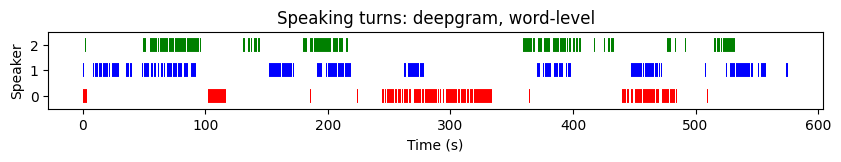

In [ ]:
plt.figure(figsize=(10, 1))
plt.ylim(-.5, 2.5)
for speaker, rows in enumerate(deep_words):
    plt.hlines(rows['speaker'], rows['start'], rows['end'], color=["r","b", "g"][speaker], linewidth=10)
    plt.ylabel("Speaker")
    plt.xlabel("Time (s)")
    plt.title("Speaking turns: deepgram, word-level")

plt.yticks([0,1,2])

## Segments

In [ ]:
files = sorted(glob.glob("*deepgram-seg*"))
files

['1674660535410-2428b340-9dc1-40e7-831c-0703795b3307-cam-audio-1674660538423.wav.transcript.json-deepgram-seg.csv',
 '1674660535410-a7b0bec8-a1fd-4f9a-a922-e20bd56a539b-cam-audio-1674660537992.wav.transcript.json-deepgram-seg.csv',
 '1674660535410-ae4d075b-39b6-48ec-a7c0-868d6fd06afe-cam-audio-1674660543681.wav.transcript.json-deepgram-seg.csv']

In [ ]:
deep_seg = []
num = 0
for file in files:
    # Read the file into a DataFrame
    df = pd.read_csv(file)  # or use pd.read_excel, pd.read_json, etc., depending on your file type
    df['speaker'] = num
    num += 1
    # Append the DataFrame to the list
    deep_seg.append(df)

([<matplotlib.axis.YTick at 0x7ee82a733730>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2')])

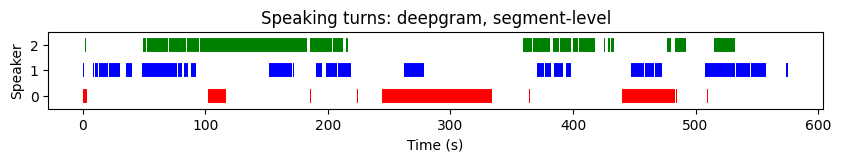

In [ ]:
plt.figure(figsize=(10, 1))
plt.ylim(-.5, 2.5)
for speaker, rows in enumerate(deep_seg):
    plt.hlines(rows['speaker'], rows['start'], rows['end'], color=["r","b", "g"][speaker], linewidth=10)
    plt.ylabel("Speaker")
    plt.xlabel("Time (s)")
    plt.title("Speaking turns: deepgram, segment-level")
plt.yticks([0,1,2])

# Speaker 1 (ends in 23)

In [4]:
audio_path = '/content/1674660535410-2428b340-9dc1-40e7-831c-0703795b3307-cam-audio-1674660538423'
start_time = getStart(audio_path)

In [5]:
start_time

2.871

In [6]:
import glob

# Pattern to match files containing both "1674660538423" and "words" in any order
files = sorted(glob.glob("*1674660538423*words*") + glob.glob("*1674660538423-whisper.csv"))
files

# Assuming df1, df2, df3 are your dataframes for each software
# And each dataframe has 'start' and 'stop' columns
dataframes = []
dataframes = make_df(dataframes, files, start_time)
software_names = ['Stable-ts', 'Whisper', 'WhisperX', 'Deepgram']
colors = ['red', 'green', 'blue', 'purple']  # Different color for each software

In [7]:
files

['1674660535410-2428b340-9dc1-40e7-831c-0703795b3307-cam-audio-1674660538423-ts-words.csv',
 '1674660535410-2428b340-9dc1-40e7-831c-0703795b3307-cam-audio-1674660538423-whisper.csv',
 '1674660535410-2428b340-9dc1-40e7-831c-0703795b3307-cam-audio-1674660538423-whisperx-words.csv',
 '1674660535410-2428b340-9dc1-40e7-831c-0703795b3307-cam-audio-1674660538423.wav.transcript.json-deepgram-words.csv']

TODO: make sure that the rolling window is centered
make two new columns in the correlation: one with the current volume rolling average, another with a "centered" rolling average

This documentation shows how you can make a centered rolling average.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html




In [8]:
# Load the audio file
audio_path = '/content/1674660535410-2428b340-9dc1-40e7-831c-0703795b3307-cam-audio-1674660538423'
audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate

# Calculate RMS in frames
frame_length = 1024
hop_length = 512
rms = librosa.feature.rms(y=audio, frame_length=frame_length, hop_length=hop_length)[0]

# Convert RMS to decibels
rms_db = librosa.amplitude_to_db(rms, ref=np.max)

# Increase the window for more smoothing
smoothing_window = 10  # Increase the window size for the rolling mean
rolling_rms_db = pd.Series(rms_db).rolling(window=smoothing_window, min_periods=1).mean()
rolling_rms_db_center = pd.Series(rms_db).rolling(window=smoothing_window, min_periods=1, center = True).mean()

# Time axis for the audio file
frames = range(len(rms_db)) # the length of rms_db is 50652?????
time = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length) + start_time

<ipython-input-8-0bce4aafa7af>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
len(rms)

50652

In [ ]:
len(rms_db)

50652

In [ ]:
rolling_rms_db

0       -18.761539
1       -18.188444
2       -15.909115
3       -14.616684
4       -14.907927
           ...    
50647   -63.932492
50648   -63.898672
50649   -63.824903
50650   -63.621204
50651   -63.598009
Length: 50652, dtype: float64

In [ ]:
# insert code for the boolean (above/below threshold)
rolling_db = rolling_rms_db.to_frame()

In [ ]:
rolling_db['threshold'] = rolling_db[0] <= -60

In [ ]:
rolling_db

Figures!

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


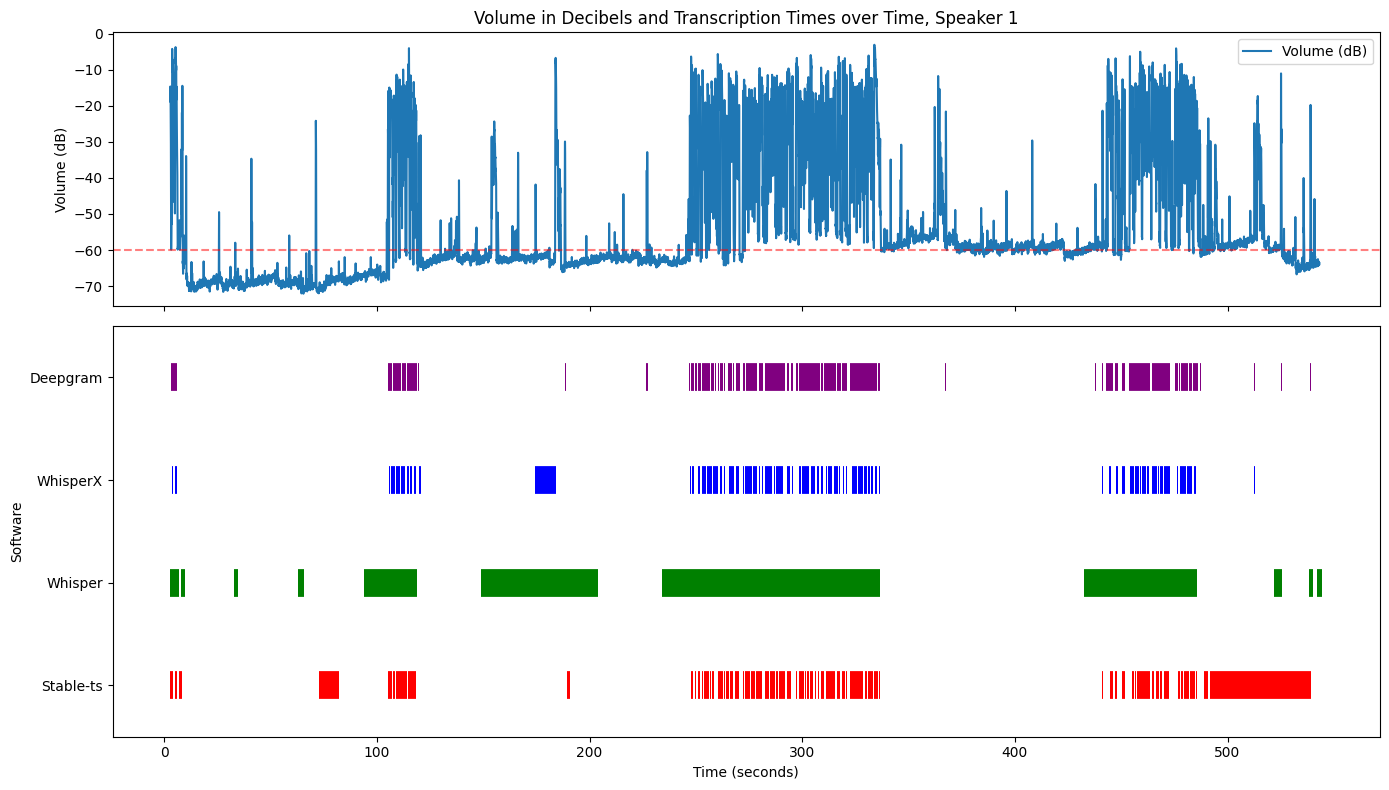

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(14, 8), sharex=True,
    gridspec_kw={'height_ratios': [1, 1.5]}  # This makes the top plot 3 times taller than the bottom
)

# Plot the smoothed volume in decibels on the first subplot
ax1.plot(time, rolling_rms_db, label='Volume (dB)')  # Apply some transparency with alpha
ax1.set_ylabel('Volume (dB)')
ax1.set_title('Volume in Decibels and Transcription Times over Time, Speaker 1')
ax1.legend(loc='upper right')

# Highlight a threshold (example value, set it to what's relevant for your analysis)
threshold = -60
ax1.axhline(threshold, color='red', linestyle='--', label='Threshold (dB)', alpha=0.5)

# TODO: above/below threshold? if over -60, return a boolean outcome

# Plot each software's data on the second subplot
# Decrease the line width if needed
for i, (df, software) in enumerate(zip(dataframes, software_names)):
    y_value = i  # Unique y-value for each software
    for start, end in zip(df['start'], df['end']):
        ax2.hlines(y_value, start, end, colors=colors[i], lw = 20)

# Narrow the y-axis limits to bring lines closer together
ax2.set_ylim(-0.5, len(dataframes) - 0.5)  # Adjust the limits to bring lines closer
ax2.set_yticks(range(len(software_names)))
ax2.set_yticklabels(software_names)
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Software')

# Show the plot
plt.tight_layout()
plt.show()

Below are the plots where we denote silence. \\
TODO: figure out why the code for `rolling_rms_db > threshold` is a "greater than" since we're trying to mark when decibels are lower than the threshold, -60.

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


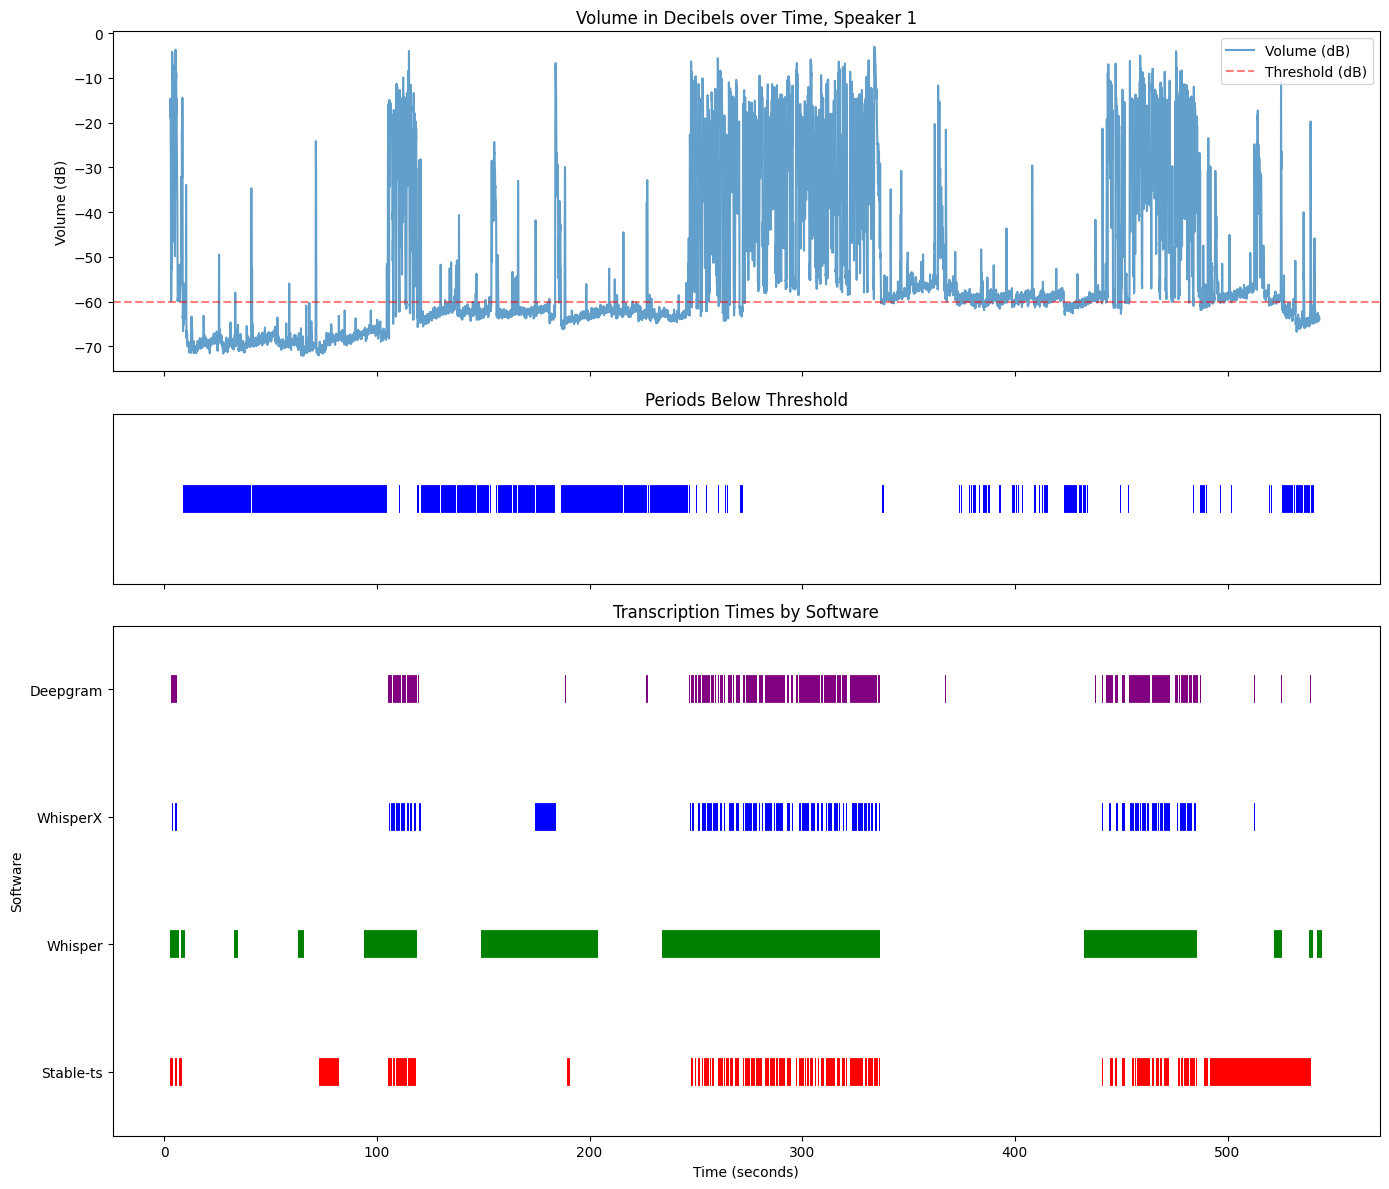

In [ ]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import pandas as pd

# Calculate a boolean series for whether the volume is below the threshold
threshold = -60
below_threshold = rolling_rms_db > threshold

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(
    3, 1, figsize=(14, 12), sharex=True,
    gridspec_kw={'height_ratios': [1, 0.5, 1.5]}  # Adjust the middle plot height ratio as needed
)

# First subplot: Smoothed volume in decibels over time
ax1.plot(time, rolling_rms_db, label='Volume (dB)', alpha=0.7)
ax1.set_ylabel('Volume (dB)')
ax1.set_title('Volume in Decibels over Time, Speaker 1')
ax1.axhline(threshold, color='red', linestyle='--', label='Threshold (dB)', alpha=0.5)
ax1.legend(loc='upper right')

# Second subplot: Above/Below threshold
# Plot horizontal lines where the volume is below the threshold
below_threshold_indices = np.where(rolling_rms_db > threshold)[0]
for start, end in zip(below_threshold_indices[:-1], below_threshold_indices[1:]):
    if end - start > 1:  # Check if the indices are consecutive
        ax2.hlines(0.5, time[start], time[end], colors='blue', lw=20)

ax2.set_yticks([])
ax2.set_title('Periods Below Threshold')

# Third subplot: Software transcription times over time
# Plot each software's data on the third subplot
for i, (df, software) in enumerate(zip(dataframes, software_names)):
    y_value = i  # Unique y-value for each software
    for start, end in zip(df['start'], df['end']):
        ax3.hlines(y_value, start, end, colors=colors[i], lw=20)
ax3.set_ylim(-0.5, len(dataframes) - 0.5)
ax3.set_yticks(range(len(software_names)))
ax3.set_yticklabels(software_names)
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Software')
ax3.set_title('Transcription Times by Software')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Speaker 2 (ends in 92)

In [9]:
files = sorted(glob.glob("*1674660537992*words*") + glob.glob("*1674660537992-whisper.csv"))
files

['1674660535410-a7b0bec8-a1fd-4f9a-a922-e20bd56a539b-cam-audio-1674660537992-ts-words.csv',
 '1674660535410-a7b0bec8-a1fd-4f9a-a922-e20bd56a539b-cam-audio-1674660537992-whisper-words.csv',
 '1674660535410-a7b0bec8-a1fd-4f9a-a922-e20bd56a539b-cam-audio-1674660537992-whisper.csv',
 '1674660535410-a7b0bec8-a1fd-4f9a-a922-e20bd56a539b-cam-audio-1674660537992.wav.transcript.json-deepgram-words.csv']

In [10]:
audio_path = '/content/1674660535410-a7b0bec8-a1fd-4f9a-a922-e20bd56a539b-cam-audio-1674660537992'
start_time = getStart(audio_path)

In [11]:
# Assuming df1, df2, df3 are your dataframes for each software
# And each dataframe has 'start' and 'stop' columns
dataframes = []
dataframes = make_df(dataframes, files, start_time)
software_names = ['Stable-ts', 'Whisper', 'WhisperX', 'Deepgram']
colors = ['red', 'green', 'blue', 'purple']  # Different color for each software

In [34]:
# Load the audio file
audio_path = '/content/1674660535410-a7b0bec8-a1fd-4f9a-a922-e20bd56a539b-cam-audio-1674660537992'
audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate

# Calculate RMS in frames
frame_length = 1024
hop_length = 512
rms = librosa.feature.rms(y=audio, frame_length=frame_length, hop_length=hop_length)[0]

# Convert RMS to decibels
rms_db = librosa.amplitude_to_db(rms, ref=np.max)

# Increase the window for more smoothing
smoothing_window = 10  # Increase the window size for the rolling mean
rolling_rms_db = pd.Series(rms_db).rolling(window=smoothing_window, min_periods=1).mean()
rolling_rms_db_center = pd.Series(rms_db).rolling(window=smoothing_window, min_periods=1, center = True).mean()

# TODO: rolling_rms_db is a pandas Series.. convert to a df? download as a csv?

# Time axis for the audio file
frames = range(len(rms_db)) # the length of rms_db is 50652?????
time = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length) + start_time

<ipython-input-34-563da8df47c2>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


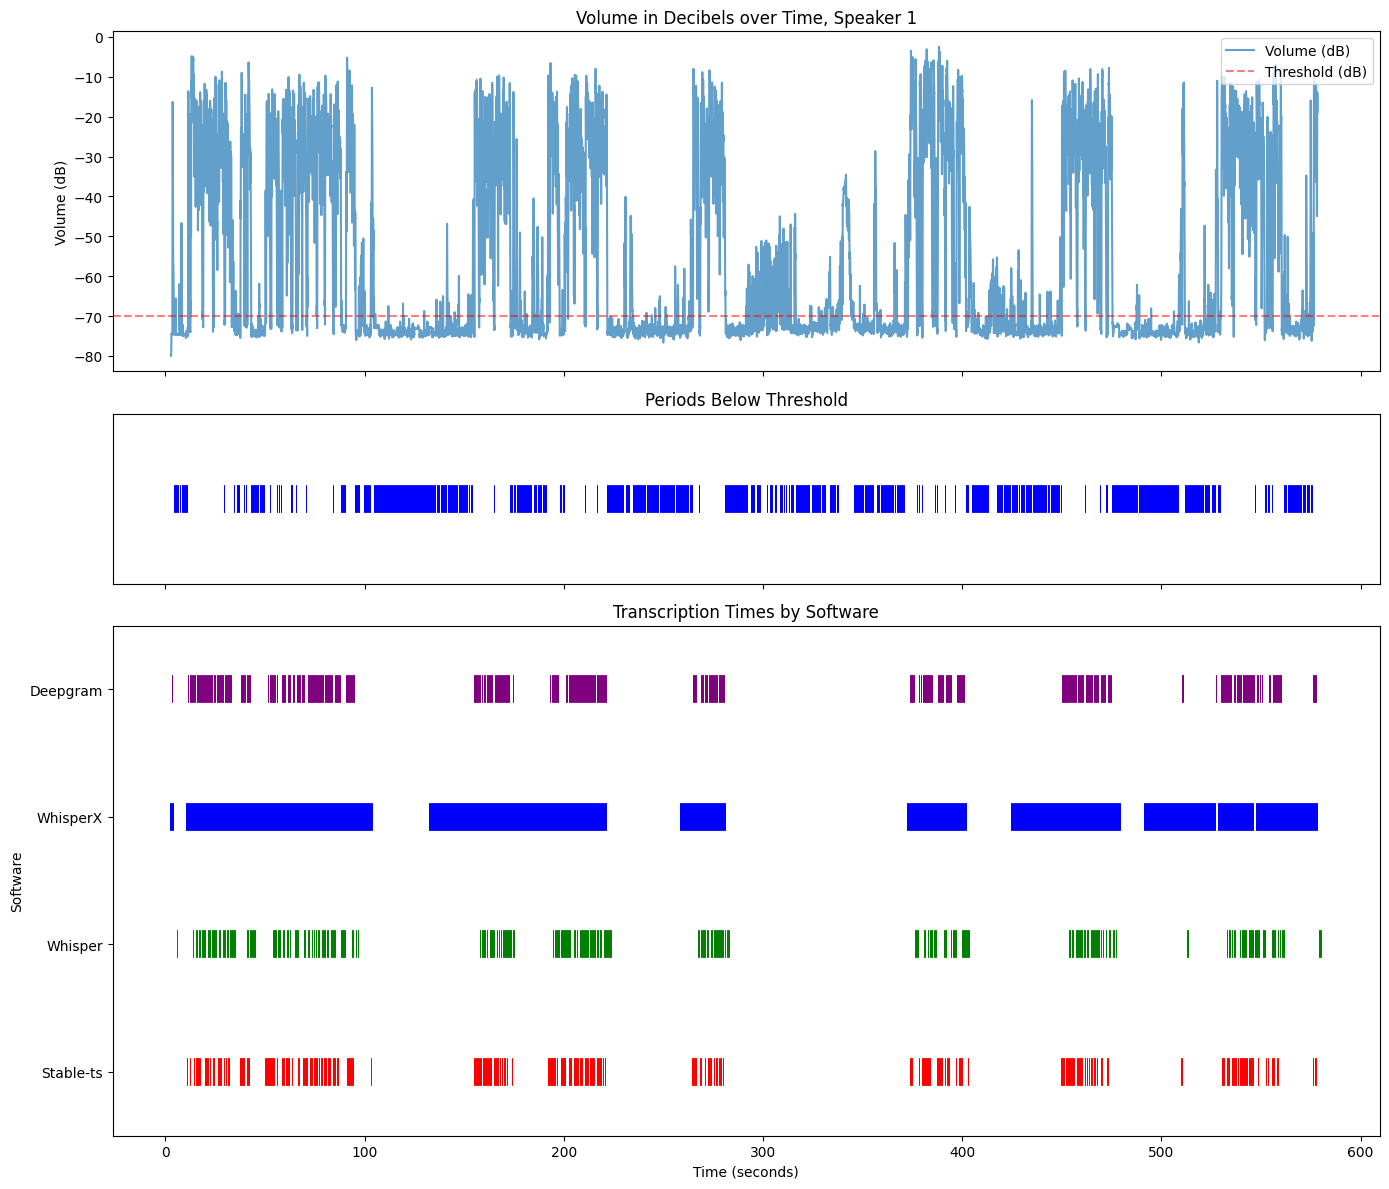

In [ ]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import pandas as pd

# Calculate a boolean series for whether the volume is below the threshold
threshold = -70
below_threshold = rolling_rms_db > threshold

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(
    3, 1, figsize=(14, 12), sharex=True,
    gridspec_kw={'height_ratios': [1, 0.5, 1.5]}  # Adjust the middle plot height ratio as needed
)

# First subplot: Smoothed volume in decibels over time
ax1.plot(time, rolling_rms_db, label='Volume (dB)', alpha=0.7)
ax1.set_ylabel('Volume (dB)')
ax1.set_title('Volume in Decibels over Time, Speaker 2')
ax1.axhline(threshold, color='red', linestyle='--', label='Threshold (dB)', alpha=0.5)
ax1.legend(loc='upper right')

# Second subplot: Above/Below threshold
# Plot horizontal lines where the volume is below the threshold
below_threshold_indices = np.where(rolling_rms_db > threshold)[0]
for start, end in zip(below_threshold_indices[:-1], below_threshold_indices[1:]):
    if end - start > 1:  # Check if the indices are consecutive
        ax2.hlines(0.5, time[start], time[end], colors='blue', lw=20)

ax2.set_yticks([])
ax2.set_title('Periods Below Threshold')

# Third subplot: Software transcription times over time
# Plot each software's data on the third subplot
for i, (df, software) in enumerate(zip(dataframes, software_names)):
    y_value = i  # Unique y-value for each software
    for start, end in zip(df['start'], df['end']):
        ax3.hlines(y_value, start, end, colors=colors[i], lw=20)
ax3.set_ylim(-0.5, len(dataframes) - 0.5)
ax3.set_yticks(range(len(software_names)))
ax3.set_yticklabels(software_names)
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Software')
ax3.set_title('Transcription Times by Software')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<ipython-input-51-50bc83b48053>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


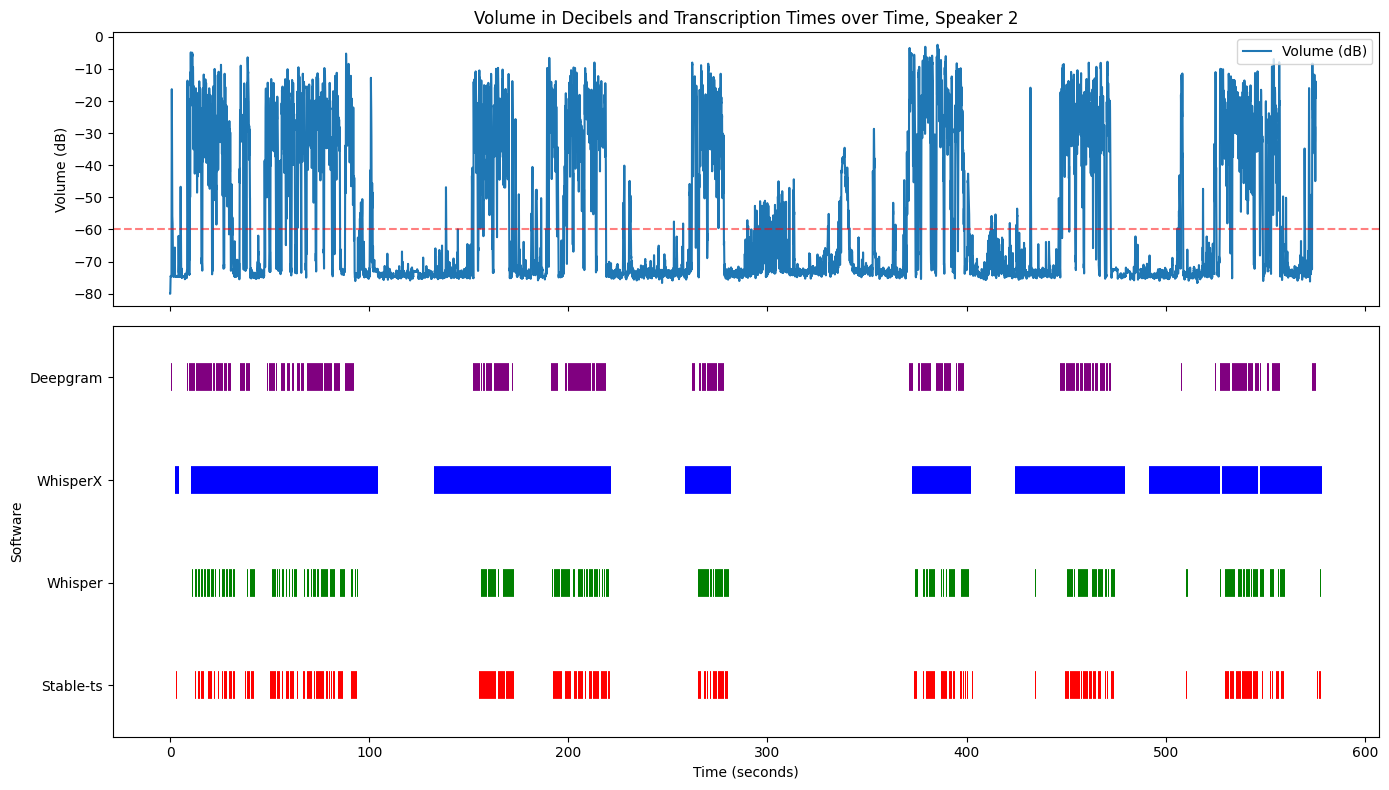

In [ ]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import pandas as pd
import glob

# Assuming df1, df2, df3 are your dataframes for each software
# And each dataframe has 'start' and 'stop' columns
dataframes = []
dataframes = make_df(dataframes, files)
software_names = ['Stable-ts', 'WhisperX', 'Whisper', 'Deepgram']
colors = ['red', 'green', 'blue', 'purple']  # Different color for each software

# Load the audio file
audio_path = '/content/1674660535410-a7b0bec8-a1fd-4f9a-a922-e20bd56a539b-cam-audio-1674660537992'
audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate

# Calculate RMS in frames
frame_length = 1024
hop_length = 512
rms = librosa.feature.rms(y=audio, frame_length=frame_length, hop_length=hop_length)[0]

# Convert RMS to decibels
rms_db = librosa.amplitude_to_db(rms, ref=np.max)

# Increase the window for more smoothing
smoothing_window = 10  # Increase the window size for the rolling mean
rolling_rms_db = pd.Series(rms_db).rolling(window=smoothing_window, min_periods=1).mean()

# Time axis for the audio file
frames = range(len(rms_db))
time = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(14, 8), sharex=True,
    gridspec_kw={'height_ratios': [1, 1.5]}  # This makes the top plot 3 times taller than the bottom
)

# Plot the smoothed volume in decibels on the first subplot
ax1.plot(time, rolling_rms_db, label='Volume (dB)')  # Apply some transparency with alpha
ax1.set_ylabel('Volume (dB)')
ax1.set_title('Volume in Decibels and Transcription Times over Time, Speaker 2')
ax1.legend(loc='upper right')

# Highlight a threshold (example value, set it to what's relevant for your analysis)
threshold = -60
ax1.axhline(threshold, color='red', linestyle='--', label='Threshold (dB)', alpha=0.5)

# Plot each software's data on the second subplot
# Decrease the line width if needed
for i, (df, software) in enumerate(zip(dataframes, software_names)):
    y_value = i  # Unique y-value for each software
    for start, end in zip(df['start'], df['end']):
        ax2.hlines(y_value, start, end, colors=colors[i], lw = 20)

# Narrow the y-axis limits to bring lines closer together
ax2.set_ylim(-0.5, len(dataframes) - 0.5)  # Adjust the limits to bring lines closer
ax2.set_yticks(range(len(software_names)))
ax2.set_yticklabels(software_names)
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Software')

# Show the plot
plt.tight_layout()
plt.show()

# Speaker 3 (ends 81)

In [13]:
files = sorted(glob.glob("*1674660543681*words*") + glob.glob("*1674660543681-whisper.csv"))
files

['1674660535410-ae4d075b-39b6-48ec-a7c0-868d6fd06afe-cam-audio-1674660543681-ts-words.csv',
 '1674660535410-ae4d075b-39b6-48ec-a7c0-868d6fd06afe-cam-audio-1674660543681-whisper.csv',
 '1674660535410-ae4d075b-39b6-48ec-a7c0-868d6fd06afe-cam-audio-1674660543681-whisperx-words.csv',
 '1674660535410-ae4d075b-39b6-48ec-a7c0-868d6fd06afe-cam-audio-1674660543681.wav.transcript.json-deepgram-words.csv']

In [14]:
# Assuming df1, df2, df3 are your dataframes for each software
# And each dataframe has 'start' and 'stop' columns
dataframes = []
dataframes = make_df(dataframes, files, start_time)
software_names = ['Stable-ts', 'Whisper', 'WhisperX', 'Deepgram']
colors = ['red', 'green', 'blue', 'purple']  # Different color for each software

In [29]:
# Load the audio file
audio_path = '1674660535410-ae4d075b-39b6-48ec-a7c0-868d6fd06afe-cam-audio-1674660543681'
audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate

# Calculate RMS in frames
frame_length = 1024
hop_length = 512
rms = librosa.feature.rms(y=audio, frame_length=frame_length, hop_length=hop_length)[0]

# Convert RMS to decibels
rms_db = librosa.amplitude_to_db(rms, ref=np.max)

# Increase the window for more smoothing
smoothing_window = 10  # Increase the window size for the rolling mean
rolling_rms_db = pd.Series(rms_db).rolling(window=smoothing_window, min_periods=1).mean()
rolling_rms_db_center = pd.Series(rms_db).rolling(window=smoothing_window, min_periods=1, center = True).mean()

# TODO: rolling_rms_db is a pandas Series.. convert to a df? download as a csv?

# Time axis for the audio file
frames = range(len(rms_db)) # the length of rms_db is 50652?????
time = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length) + start_time

<ipython-input-29-ba5fa122d6f9>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import pandas as pd

# Calculate a boolean series for whether the volume is below the threshold
threshold = -70
below_threshold = rolling_rms_db > threshold

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(
    3, 1, figsize=(14, 12), sharex=True,
    gridspec_kw={'height_ratios': [1, 0.5, 1.5]}  # Adjust the middle plot height ratio as needed
)

# First subplot: Smoothed volume in decibels over time
ax1.plot(time, rolling_rms_db, label='Volume (dB)', alpha=0.7)
ax1.set_ylabel('Volume (dB)')
ax1.set_title('Volume in Decibels over Time, Speaker 2')
ax1.axhline(threshold, color='red', linestyle='--', label='Threshold (dB)', alpha=0.5)
ax1.legend(loc='upper right')

# Second subplot: Above/Below threshold
# Plot horizontal lines where the volume is below the threshold
below_threshold_indices = np.where(rolling_rms_db > threshold)[0]
for start, end in zip(below_threshold_indices[:-1], below_threshold_indices[1:]):
    if end - start > 1:  # Check if the indices are consecutive
        ax2.hlines(0.5, time[start], time[end], colors='blue', lw=20)

ax2.set_yticks([])
ax2.set_title('Periods Below Threshold')

# Third subplot: Software transcription times over time
# Plot each software's data on the third subplot
for i, (df, software) in enumerate(zip(dataframes, software_names)):
    y_value = i  # Unique y-value for each software
    for start, end in zip(df['start'], df['end']):
        ax3.hlines(y_value, start, end, colors=colors[i], lw=20)
ax3.set_ylim(-0.5, len(dataframes) - 0.5)
ax3.set_yticks(range(len(software_names)))
ax3.set_yticklabels(software_names)
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Software')
ax3.set_title('Transcription Times by Software')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

NameError: name 'rolling_rms_db' is not defined

In [ ]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import pandas as pd
import glob

# Assuming df1, df2, df3 are your dataframes for each software
# And each dataframe has 'start' and 'stop' columns
dataframes = []
dataframes = make_df(dataframes, files)
software_names = ['Stable-ts', 'Whisper', 'WhisperX', 'Deepgram']
colors = ['red', 'green', 'blue', 'purple']  # Different color for each software

# Load the audio file
audio_path = '/content/1674660535410-ae4d075b-39b6-48ec-a7c0-868d6fd06afe-cam-audio-1674660543681'
audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate

# Calculate RMS in frames
frame_length = 1024
hop_length = 512
rms = librosa.feature.rms(y=audio, frame_length=frame_length, hop_length=hop_length)[0]

# Convert RMS to decibels
rms_db = librosa.amplitude_to_db(rms, ref=np.max)

# Increase the window for more smoothing
smoothing_window = 10  # Increase the window size for the rolling mean
rolling_rms_db = pd.Series(rms_db).rolling(window=smoothing_window, min_periods=1).mean()

# Time axis for the audio file
frames = range(len(rms_db))
time = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(14, 8), sharex=True,
    gridspec_kw={'height_ratios': [1, 1.5]}  # This makes the top plot 3 times taller than the bottom
)

# Plot the smoothed volume in decibels on the first subplot
ax1.plot(time, rolling_rms_db, label='Volume (dB)')  # Apply some transparency with alpha
ax1.set_ylabel('Volume (dB)')
ax1.set_title('Volume in Decibels and Transcription Times over Time, Speaker 3')
ax1.legend(loc='upper right')

# Highlight a threshold (example value, set it to what's relevant for your analysis)
threshold = -60
ax1.axhline(threshold, color='red', linestyle='--', label='Threshold (dB)', alpha=0.5)

# Plot each software's data on the second subplot
# Decrease the line width if needed
for i, (df, software) in enumerate(zip(dataframes, software_names)):
    y_value = i  # Unique y-value for each software
    for start, end in zip(df['start'], df['end']):
        ax2.hlines(y_value, start, end, colors=colors[i], lw = 20)

# Narrow the y-axis limits to bring lines closer together
ax2.set_ylim(-0.5, len(dataframes) - 0.5)  # Adjust the limits to bring lines closer
ax2.set_yticks(range(len(software_names)))
ax2.set_yticklabels(software_names)
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Software')

# Show the plot
plt.tight_layout()
plt.show()

TypeError: make_df() missing 1 required positional argument: 'start_time'

# Testing matrix

NOTE: the calculated db is different from the `rolling_rms_db` above since it divides the times into 0.5 seconds and then averages from there.

## 23

In [75]:
audio_path = '/content/1674660535410-2428b340-9dc1-40e7-831c-0703795b3307-cam-audio-1674660538423'
audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate

<ipython-input-75-70fce50f33f7>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [76]:
# Assuming `audio_length` is the duration of your audio file in seconds
audio_length = librosa.get_duration(y=audio, sr=sr)
# Define the interval length in seconds (e.g., 0.5 for half a second)
interval_length = 0.5
# Calculate the number of intervals
num_intervals = int(np.ceil(audio_length / interval_length))

In [77]:
start_time = getStart(audio_path)

In [78]:
# Pattern to match files containing both "1674660538423" and "words" in any order
files = sorted(glob.glob("*1674660538423*words*") + glob.glob("*1674660538423-whisper.csv"))
files

# Assuming df1, df2, df3 are your dataframes for each software
# And each dataframe has 'start' and 'stop' columns
dataframes = []
dataframes = make_df(dataframes, files, start_time)
software_names = ['Stable-ts', 'Whisper', 'WhisperX', 'Deepgram']

In [79]:
# Generate the timestamps for each interval
timestamps = np.arange(0, audio_length, interval_length)

# Initialize a DataFrame to hold the speech matrix with timestamps as the index
speech_matrix = pd.DataFrame(0, index=timestamps, columns=software_names)

for idx, start_time in enumerate(timestamps):
    # Calculate the end time of the current interval
    end_time = start_time + interval_length

    # Now, for each software's DataFrame, check if the interval overlaps with speech
    for software_name, df in zip(software_names, dataframes):
        # Iterate over each row in the software's DataFrame
        for _, row in df.iterrows():
            # Skip rows with NaN in 'start' or 'end'
            if pd.isnull(row['start']) or pd.isnull(row['end']):
                continue

            # Check if the current interval overlaps with the start and end times
            if row['start'] < end_time and row['end'] > start_time:
                # Mark this interval as 1 in the speech matrix for this software
                speech_matrix.at[start_time, software_name] = 1
                break  # No need to check further rows once an overlap is found

# Volume code
# Calculate the number of samples per interval
samples_per_interval = int(sr * interval_length)

# Initialize a list to hold the RMS values
rms_values = []

# Segment the audio and calculate RMS for each segment
for start in range(0, len(audio), samples_per_interval):
    end = start + samples_per_interval
    audio_chunk = audio[start:end]
    rms = np.sqrt(np.mean(audio_chunk**2))
    rms_values.append(rms)

# Convert the RMS values to dB
rms_values_db = librosa.amplitude_to_db(np.array(rms_values), ref=np.max)

# Convert to Series
rms_series = pd.Series(rms_values_db, index=timestamps)

# Add column to speech_matrix
speech_matrix['RMS_dB'] = rms_series

# Define the rolling window size
window_size = 10  # This is an arbitrary choice; adjust based on your requirements

# Apply a not centered rolling window
speech_matrix['Rolling_RMS_dB_Not_Centered'] = speech_matrix['RMS_dB'].rolling(window=window_size, min_periods=1, center=False).mean()

# Apply a centered rolling window
speech_matrix['Rolling_RMS_dB_Centered'] = speech_matrix['RMS_dB'].rolling(window=window_size, min_periods=1, center=True).mean()

# Now, 'rms_df' contains the original RMS dB values and the smoothed values using both rolling window methods
speech_matrix

,Stable-ts,Whisper,WhisperX,Deepgram,RMS_dB,Rolling_RMS_dB_Not_Centered,Rolling_RMS_dB_Centered
0.0,0,0,0,0,-14.783428,-14.783428,-9.731232
0.5,0,0,0,0,-2.580870,-8.682149,-8.709206
1.0,0,0,0,0,-4.312975,-7.225758,-10.695617
1.5,0,0,0,0,-24.356665,-11.508484,-15.773743
2.0,0,0,0,0,-2.622225,-9.731232,-19.524963
...,...,...,...,...,...,...,...
538.0,1,1,0,0,-55.570389,-53.093116,-52.720040
538.5,1,1,0,1,-58.343178,-52.994316,-52.082016
539.0,1,1,0,1,-58.191978,-52.912567,-56.111063
539.5,0,1,0,0,-58.066673,-52.819549,-55.794758


In [80]:
speech_matrix.corr()

,Stable-ts,Whisper,WhisperX,Deepgram,RMS_dB,Rolling_RMS_dB_Not_Centered,Rolling_RMS_dB_Centered
Stable-ts,1.000000,0.368713,0.628693,0.668062,0.533394,0.650752,0.609454
Whisper,0.368713,1.000000,0.595972,0.611792,0.552860,0.614674,0.626708
WhisperX,0.628693,0.595972,1.000000,0.849375,0.670902,0.792203,0.762396
Deepgram,0.668062,0.611792,0.849375,1.000000,0.717942,0.859840,0.818864
RMS_dB,0.533394,0.552860,0.670902,0.717942,1.000000,0.861906,0.899978
Rolling_RMS_dB_Not_Centered,0.650752,0.614674,0.792203,0.859840,0.861906,1.000000,0.958367
Rolling_RMS_dB_Centered,0.609454,0.626708,0.762396,0.818864,0.899978,0.958367,1.000000


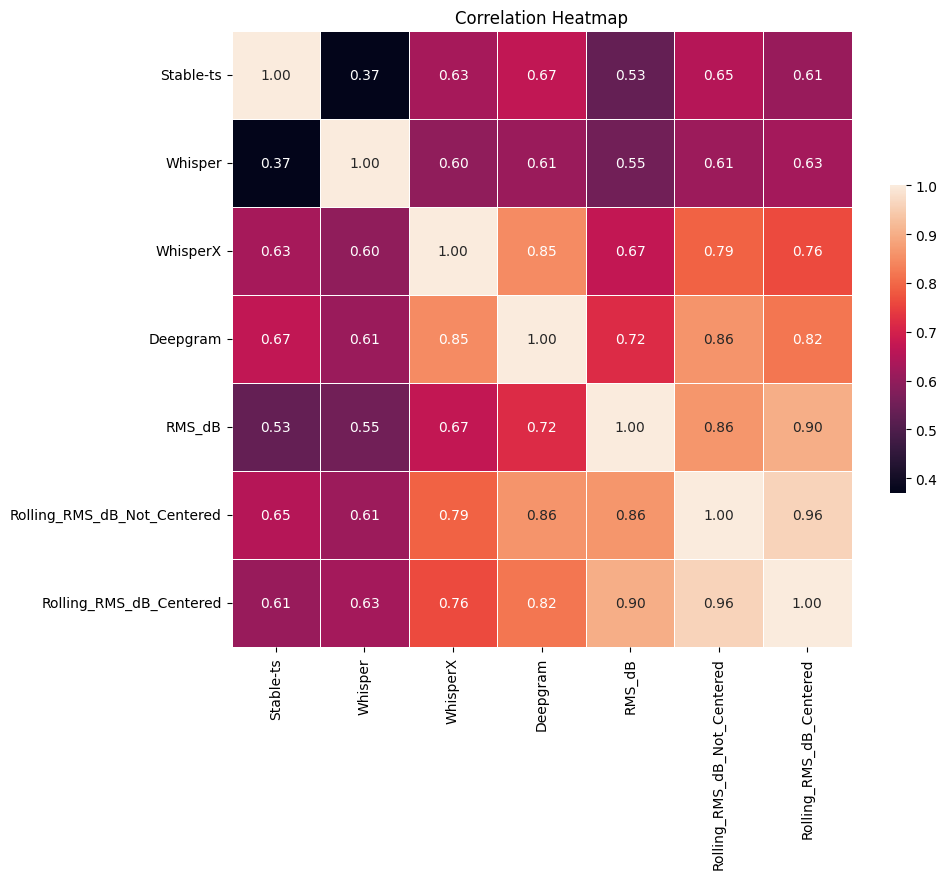

In [81]:
corr_matrix = speech_matrix.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Add labels (optional, depends on the DataFrame's columns)
plt.title('Correlation Heatmap')
plt.show()

## 92

In [50]:
files = sorted(glob.glob("*1674660537992*words*") + glob.glob("*1674660537992-whisper.csv"))
files

['1674660535410-a7b0bec8-a1fd-4f9a-a922-e20bd56a539b-cam-audio-1674660537992-ts-words.csv',
 '1674660535410-a7b0bec8-a1fd-4f9a-a922-e20bd56a539b-cam-audio-1674660537992-whisper-words.csv',
 '1674660535410-a7b0bec8-a1fd-4f9a-a922-e20bd56a539b-cam-audio-1674660537992-whisper.csv',
 '1674660535410-a7b0bec8-a1fd-4f9a-a922-e20bd56a539b-cam-audio-1674660537992.wav.transcript.json-deepgram-words.csv']

In [51]:
audio_path = '/content/1674660535410-a7b0bec8-a1fd-4f9a-a922-e20bd56a539b-cam-audio-1674660537992'
start_time = getStart(audio_path)
audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate

<ipython-input-51-21ea133ee9ca>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [52]:
# Assuming `audio_length` is the duration of your audio file in seconds
audio_length = librosa.get_duration(y=audio, sr=sr)
# Define the interval length in seconds (e.g., 0.5 for half a second)
interval_length = 0.5
# Calculate the number of intervals
num_intervals = int(np.ceil(audio_length / interval_length))

In [54]:
# Assuming df1, df2, df3 are your dataframes for each software
# And each dataframe has 'start' and 'stop' columns
dataframes = []
dataframes = make_df(dataframes, files, start_time)
software_names = ['Stable-ts', 'Whisper', 'WhisperX', 'Deepgram']

In [55]:
# Generate the timestamps for each interval
timestamps = np.arange(0, audio_length, interval_length)

# Initialize a DataFrame to hold the speech matrix with timestamps as the index
speech_matrix = pd.DataFrame(0, index=timestamps, columns=software_names)

for idx, start_time in enumerate(timestamps):
    # Calculate the end time of the current interval
    end_time = start_time + interval_length

    # Now, for each software's DataFrame, check if the interval overlaps with speech
    for software_name, df in zip(software_names, dataframes):
        # Iterate over each row in the software's DataFrame
        for _, row in df.iterrows():
            # Skip rows with NaN in 'start' or 'end'
            if pd.isnull(row['start']) or pd.isnull(row['end']):
                continue

            # Check if the current interval overlaps with the start and end times
            if row['start'] < end_time and row['end'] > start_time:
                # Mark this interval as 1 in the speech matrix for this software
                speech_matrix.at[start_time, software_name] = 1
                break  # No need to check further rows once an overlap is found

# Volume code
# Calculate the number of samples per interval
samples_per_interval = int(sr * interval_length)

# Initialize a list to hold the RMS values
rms_values = []

# Segment the audio and calculate RMS for each segment
for start in range(0, len(audio), samples_per_interval):
    end = start + samples_per_interval
    audio_chunk = audio[start:end]
    rms = np.sqrt(np.mean(audio_chunk**2))
    rms_values.append(rms)

# Convert the RMS values to dB
rms_values_db = librosa.amplitude_to_db(np.array(rms_values), ref=np.max)

# Convert to Series
rms_series = pd.Series(rms_values_db, index=timestamps)

# Add column to speech_matrix
speech_matrix['RMS_dB'] = rms_series

# Define the rolling window size
window_size = 10  # This is an arbitrary choice; adjust based on your requirements

# Apply a not centered rolling window
speech_matrix['Rolling_RMS_dB_Not_Centered'] = speech_matrix['RMS_dB'].rolling(window=window_size, min_periods=1, center=False).mean()

# Apply a centered rolling window
speech_matrix['Rolling_RMS_dB_Centered'] = speech_matrix['RMS_dB'].rolling(window=window_size, min_periods=1, center=True).mean()

# Now, 'rms_df' contains the original RMS dB values and the smoothed values using both rolling window methods
speech_matrix

,Stable-ts,Whisper,WhisperX,Deepgram,RMS_dB,Rolling_RMS_dB_Not_Centered,Rolling_RMS_dB_Centered
0.0,0,0,0,0,-69.747711,-69.747711,-54.861915
0.5,0,0,0,0,-16.407818,-43.077765,-57.258571
1.0,0,0,0,0,-55.625183,-47.260237,-58.976865
1.5,0,0,0,0,-68.631432,-52.603036,-60.259988
2.0,0,0,1,0,-63.897430,-54.861915,-60.058270
...,...,...,...,...,...,...,...
573.0,0,0,1,0,-47.901367,-50.163126,-31.640747
573.5,0,0,1,0,-6.879510,-44.422751,-27.693847
574.0,1,0,1,0,-12.183045,-38.958637,-22.822698
574.5,1,0,1,0,-11.195615,-37.146306,-23.525651


In [56]:
speech_matrix.corr()

,Stable-ts,Whisper,WhisperX,Deepgram,RMS_dB,Rolling_RMS_dB_Not_Centered,Rolling_RMS_dB_Centered
Stable-ts,1.000000,0.585472,0.507729,0.883319,0.598896,0.822650,0.733854
Whisper,0.585472,1.000000,0.460803,0.636940,0.495969,0.699194,0.575035
WhisperX,0.507729,0.460803,1.000000,0.522853,0.490007,0.576603,0.566008
Deepgram,0.883319,0.636940,0.522853,1.000000,0.619857,0.867056,0.760129
RMS_dB,0.598896,0.495969,0.490007,0.619857,1.000000,0.820670,0.907663
Rolling_RMS_dB_Not_Centered,0.822650,0.699194,0.576603,0.867056,0.820670,1.000000,0.927058
Rolling_RMS_dB_Centered,0.733854,0.575035,0.566008,0.760129,0.907663,0.927058,1.000000


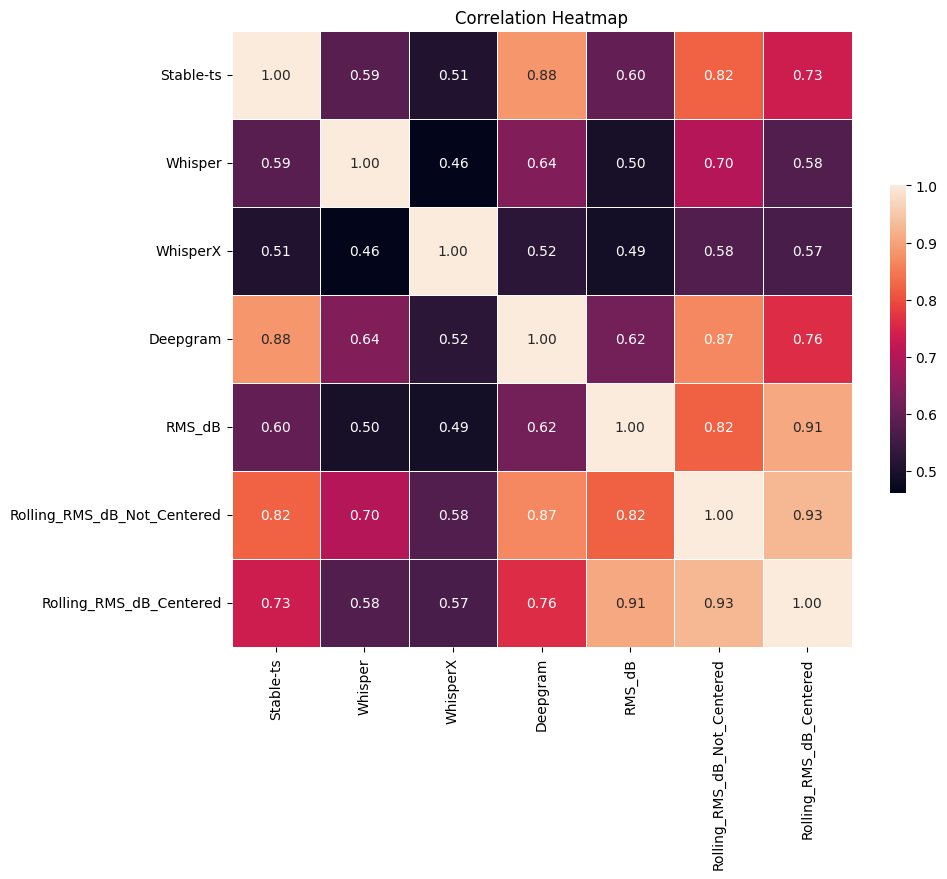

In [59]:
corr_matrix = speech_matrix.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Add labels (optional, depends on the DataFrame's columns)
plt.title('Correlation Heatmap')
plt.show()

## 81

In [68]:
files = sorted(glob.glob("*1674660543681*words*") + glob.glob("*1674660543681-whisper.csv"))
files

['1674660535410-ae4d075b-39b6-48ec-a7c0-868d6fd06afe-cam-audio-1674660543681-ts-words.csv',
 '1674660535410-ae4d075b-39b6-48ec-a7c0-868d6fd06afe-cam-audio-1674660543681-whisper.csv',
 '1674660535410-ae4d075b-39b6-48ec-a7c0-868d6fd06afe-cam-audio-1674660543681-whisperx-words.csv',
 '1674660535410-ae4d075b-39b6-48ec-a7c0-868d6fd06afe-cam-audio-1674660543681.wav.transcript.json-deepgram-words.csv']

In [69]:
audio_path = '1674660535410-ae4d075b-39b6-48ec-a7c0-868d6fd06afe-cam-audio-1674660543681'
start_time = getStart(audio_path)
audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate

<ipython-input-69-5e9f00053c0d>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)  # `sr=None` to keep original sample rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [70]:
# Assuming `audio_length` is the duration of your audio file in seconds
audio_length = librosa.get_duration(y=audio, sr=sr)
# Define the interval length in seconds (e.g., 0.5 for half a second)
interval_length = 0.5
# Calculate the number of intervals
num_intervals = int(np.ceil(audio_length / interval_length))

In [71]:
# Assuming df1, df2, df3 are your dataframes for each software
# And each dataframe has 'start' and 'stop' columns
dataframes = []
dataframes = make_df(dataframes, files, start_time)
software_names = ['Stable-ts', 'Whisper', 'WhisperX', 'Deepgram']
colors = ['red', 'green', 'blue', 'purple']  # Different color for each software

In [72]:
# Generate the timestamps for each interval
timestamps = np.arange(0, audio_length, interval_length)

# Initialize a DataFrame to hold the speech matrix with timestamps as the index
speech_matrix = pd.DataFrame(0, index=timestamps, columns=software_names)

for idx, start_time in enumerate(timestamps):
    # Calculate the end time of the current interval
    end_time = start_time + interval_length

    # Now, for each software's DataFrame, check if the interval overlaps with speech
    for software_name, df in zip(software_names, dataframes):
        # Iterate over each row in the software's DataFrame
        for _, row in df.iterrows():
            # Skip rows with NaN in 'start' or 'end'
            if pd.isnull(row['start']) or pd.isnull(row['end']):
                continue

            # Check if the current interval overlaps with the start and end times
            if row['start'] < end_time and row['end'] > start_time:
                # Mark this interval as 1 in the speech matrix for this software
                speech_matrix.at[start_time, software_name] = 1
                break  # No need to check further rows once an overlap is found

# Volume code
# Calculate the number of samples per interval
samples_per_interval = int(sr * interval_length)

# Initialize a list to hold the RMS values
rms_values = []

# Segment the audio and calculate RMS for each segment
for start in range(0, len(audio), samples_per_interval):
    end = start + samples_per_interval
    audio_chunk = audio[start:end]
    rms = np.sqrt(np.mean(audio_chunk**2))
    rms_values.append(rms)

# Convert the RMS values to dB
rms_values_db = librosa.amplitude_to_db(np.array(rms_values), ref=np.max)

# Convert to Series
rms_series = pd.Series(rms_values_db, index=timestamps)

# Add column to speech_matrix
speech_matrix['RMS_dB'] = rms_series

# Define the rolling window size
window_size = 10  # This is an arbitrary choice; adjust based on your requirements

# Apply a not centered rolling window
speech_matrix['Rolling_RMS_dB_Not_Centered'] = speech_matrix['RMS_dB'].rolling(window=window_size, min_periods=1, center=False).mean()

# Apply a centered rolling window
speech_matrix['Rolling_RMS_dB_Centered'] = speech_matrix['RMS_dB'].rolling(window=window_size, min_periods=1, center=True).mean()

# Now, 'rms_df' contains the original RMS dB values and the smoothed values using both rolling window methods
speech_matrix

,Stable-ts,Whisper,WhisperX,Deepgram,RMS_dB,Rolling_RMS_dB_Not_Centered,Rolling_RMS_dB_Centered
0.0,0,0,0,0,-34.151123,-34.151123,-24.905264
0.5,0,0,0,0,-35.054714,-34.602919,-23.747445
1.0,0,0,0,0,-39.659309,-36.288382,-26.187179
1.5,0,0,0,0,-5.515367,-28.595128,-28.090009
2.0,0,0,0,0,-10.145804,-24.905264,-29.622478
...,...,...,...,...,...,...,...
531.5,1,1,1,1,-14.843995,-16.354184,-21.253705
532.0,1,1,1,1,-25.953812,-17.132397,-21.149684
532.5,1,1,1,1,-31.696815,-19.249005,-22.638818
533.0,1,1,1,1,-12.868627,-19.447749,-23.694410


In [73]:
speech_matrix.corr()

,Stable-ts,Whisper,WhisperX,Deepgram,RMS_dB,Rolling_RMS_dB_Not_Centered,Rolling_RMS_dB_Centered
Stable-ts,1.000000,0.348552,0.836632,0.864879,0.328055,0.504294,0.423944
Whisper,0.348552,1.000000,0.332604,0.370188,0.184412,0.271980,0.235096
WhisperX,0.836632,0.332604,1.000000,0.846802,0.278405,0.452902,0.368629
Deepgram,0.864879,0.370188,0.846802,1.000000,0.322703,0.510238,0.423388
RMS_dB,0.328055,0.184412,0.278405,0.322703,1.000000,0.724649,0.791594
Rolling_RMS_dB_Not_Centered,0.504294,0.271980,0.452902,0.510238,0.724649,1.000000,0.915959
Rolling_RMS_dB_Centered,0.423944,0.235096,0.368629,0.423388,0.791594,0.915959,1.000000


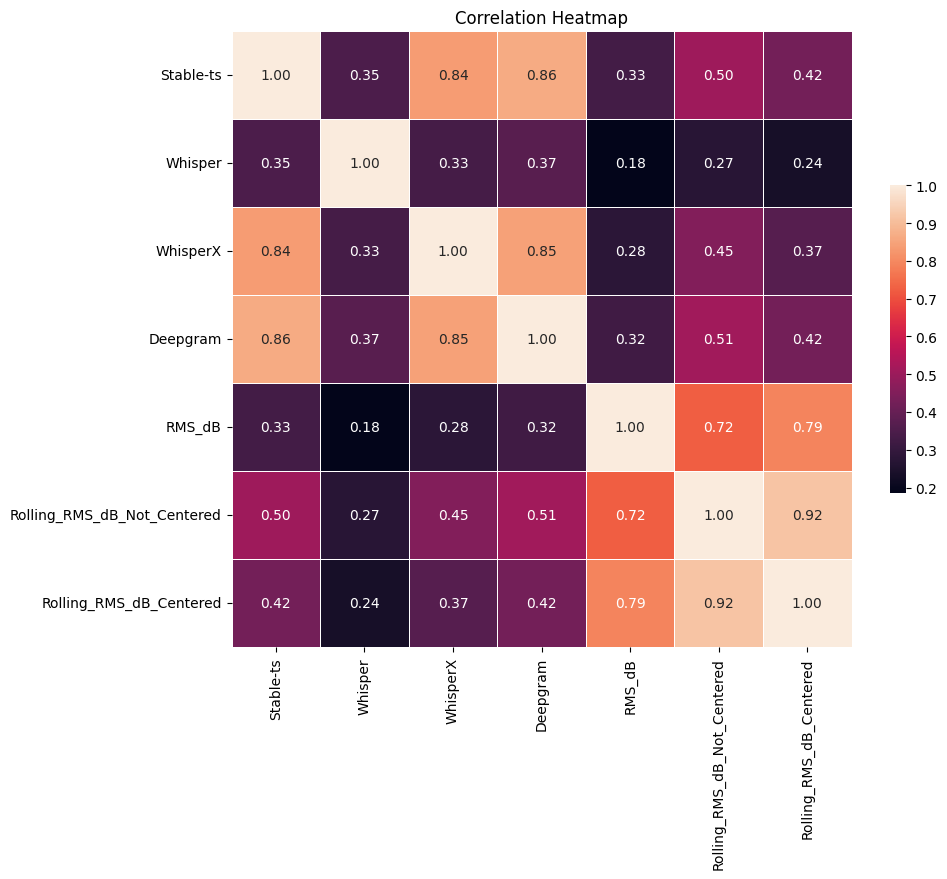

In [74]:
corr_matrix = speech_matrix.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Add labels (optional, depends on the DataFrame's columns)
plt.title('Correlation Heatmap')
plt.show()